# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [6]:
# Output File (CSV)
output_data_file = "../output_data/cities.csv"
city_df = pd.read_csv(output_data_file)
# latitudes and longitudes range
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
city_df

,Unnamed: 0,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,Hilo,US,19.7297,-155.0900,78.80,61,90,11.50,1613529916
1,1,Iqaluit,CA,63.7506,-68.5145,-14.80,70,1,6.89,1613529917
2,2,Mbanza-Ngungu,CD,-5.2500,14.8667,69.26,100,100,7.34,1613529917
3,3,Norman Wells,CA,65.2820,-126.8329,-9.40,77,75,2.91,1613529734
4,4,Constantine,DZ,36.3650,6.6147,41.67,64,5,5.53,1613529917
...,...,...,...,...,...,...,...,...,...,...
529,529,Aripuanã,BR,-9.1667,-60.6333,74.25,97,98,0.98,1613530057
530,530,Shamary,RU,57.3434,58.2199,-11.00,89,100,9.22,1613530057
531,531,Eureka,US,40.8021,-124.1637,48.99,86,15,8.99,1613529988
532,532,Bobcaygeon,CA,44.5462,-78.5420,8.60,78,1,11.50,1613530057


In [7]:
citipy

<module 'citipy.citipy' from 'C:\\Users\\ryoun\\anaconda3\\lib\\site-packages\\citipy\\citipy.py'>

In [9]:
city_df=city_df.append(city_df)
new_city_df=city_df.reset_index()
new_city_df

,index,Unnamed: 0,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,0,0,Hilo,US,19.7297,-155.0900,78.80,61,90,11.50,1613529916
1,1,1,Iqaluit,CA,63.7506,-68.5145,-14.80,70,1,6.89,1613529917
2,2,2,Mbanza-Ngungu,CD,-5.2500,14.8667,69.26,100,100,7.34,1613529917
3,3,3,Norman Wells,CA,65.2820,-126.8329,-9.40,77,75,2.91,1613529734
4,4,4,Constantine,DZ,36.3650,6.6147,41.67,64,5,5.53,1613529917
...,...,...,...,...,...,...,...,...,...,...,...
2131,529,529,Aripuanã,BR,-9.1667,-60.6333,74.25,97,98,0.98,1613530057
2132,530,530,Shamary,RU,57.3434,58.2199,-11.00,89,100,9.22,1613530057
2133,531,531,Eureka,US,40.8021,-124.1637,48.99,86,15,8.99,1613529988
2134,532,532,Bobcaygeon,CA,44.5462,-78.5420,8.60,78,1,11.50,1613530057


## Generate Cities List

In [10]:
# List for holding lat_longs for cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, long combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

654

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
#Create Query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = url + "appid=" + weather_api_key + "&units="+"imperial"+"&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=12efe3bcd2b8b59b28071e57e291ead5&units=imperial&q='

In [12]:

# lists setup
place = []
lats = []
lngs = []
temperature = []
humid = []
cloud = []
wind = []
country = []
date_time = []

#individual city and city_set (50 records per set) variables set in high 
item = 1
city_set = 1

#Looping through cities in the cities list
for city in cities:

    #for items 1 to 50
    if item < 50:
        try:
            result = requests.get(query_url + city).json()
            #Each Processed city will get an item number, even if it is not found.
            print(f"Processing {city} Number {item} in Set {city_set}.")
            item = item + 1
            #Appending relevant information to the correct list
            place.append(result['name'])
            lats.append(result['coord']['lat'])
            lngs.append(result['coord']['lon'])
            temperature.append(result['main']['temp_max'])
            humid.append(result['main']['humidity'])
            cloud.append(result['clouds']['all'])
            wind.append(result['wind']['speed'])
            country.append(result['sys']['country'])
            date_time.append(result['dt'])
                    
        except:
            print(f"{city} not found. Skipping.")
    
    else:
        #  item count reset
        item = 1
        #add one to the city_set count
        city_set = + 1
        #pause API pull 
        time.sleep(5)

Processing toamasina Number 1 in Set 1.
Processing mrirt Number 2 in Set 1.
mrirt not found. Skipping.
Processing saleaula Number 3 in Set 1.
saleaula not found. Skipping.
Processing rey bouba Number 4 in Set 1.
Processing los llanos de aridane Number 5 in Set 1.
Processing sinnamary Number 6 in Set 1.
Processing port blair Number 7 in Set 1.
Processing supe Number 8 in Set 1.
Processing ancud Number 9 in Set 1.
Processing albany Number 10 in Set 1.
Processing mataura Number 11 in Set 1.
Processing victoria Number 12 in Set 1.
Processing avarua Number 13 in Set 1.
Processing arlit Number 14 in Set 1.
Processing outjo Number 15 in Set 1.
Processing virginia beach Number 16 in Set 1.
Processing carnarvon Number 17 in Set 1.
Processing chuy Number 18 in Set 1.
Processing punta arenas Number 19 in Set 1.
Processing hellvik Number 20 in Set 1.
Processing nizhneyansk Number 21 in Set 1.
nizhneyansk not found. Skipping.
Processing ucluelet Number 22 in Set 1.
Processing biryusinsk Number 23 i

Processing souillac Number 40 in Set 1.
Processing zhanaozen Number 41 in Set 1.
Processing grand gaube Number 42 in Set 1.
Processing wajid Number 43 in Set 1.
Processing cherskiy Number 44 in Set 1.
Processing boende Number 45 in Set 1.
Processing esperance Number 46 in Set 1.
Processing saskylakh Number 47 in Set 1.
Processing hihifo Number 48 in Set 1.
hihifo not found. Skipping.
Processing demyanovo Number 49 in Set 1.
Processing nichinan Number 1 in Set 1.
Processing hilo Number 2 in Set 1.
Processing hoa binh Number 3 in Set 1.
Processing farah Number 4 in Set 1.
Processing qaanaaq Number 5 in Set 1.
Processing jimeta Number 6 in Set 1.
Processing tigil Number 7 in Set 1.
Processing nuuk Number 8 in Set 1.
Processing paoua Number 9 in Set 1.
Processing puerto del rosario Number 10 in Set 1.
Processing kavaratti Number 11 in Set 1.
Processing leningradskiy Number 12 in Set 1.
Processing tasbuget Number 13 in Set 1.
tasbuget not found. Skipping.
Processing dom pedrito Number 14 in

Processing superior Number 35 in Set 1.
Processing alberton Number 36 in Set 1.
Processing kourou Number 37 in Set 1.
Processing isla pucu Number 38 in Set 1.
Processing iskateley Number 39 in Set 1.
Processing karamay Number 40 in Set 1.
karamay not found. Skipping.
Processing broken hill Number 41 in Set 1.
Processing cayenne Number 42 in Set 1.
Processing cizre Number 43 in Set 1.
Processing chuguyevka Number 44 in Set 1.
Processing nuevo ideal Number 45 in Set 1.
Processing najran Number 46 in Set 1.
Processing mehran Number 47 in Set 1.
Processing karratha Number 48 in Set 1.
Processing bereda Number 49 in Set 1.
Processing riyadh Number 1 in Set 1.
Processing ambon Number 2 in Set 1.
Processing la ronge Number 3 in Set 1.
Processing grajau Number 4 in Set 1.
Processing oliveira dos brejinhos Number 5 in Set 1.
Processing ust-maya Number 6 in Set 1.
Processing atsiki Number 7 in Set 1.
atsiki not found. Skipping.
Processing hofn Number 8 in Set 1.
Processing chipinge Number 9 in S

Processing ketou Number 33 in Set 1.
Processing mufumbwe Number 34 in Set 1.
Processing yanan Number 35 in Set 1.
yanan not found. Skipping.
Processing rudnogorsk Number 36 in Set 1.
Processing beruwala Number 37 in Set 1.
Processing teguise Number 38 in Set 1.
Processing pueblo rico Number 39 in Set 1.
Processing sovetskaya Number 40 in Set 1.
Processing lahaina Number 41 in Set 1.
Processing lockhart Number 42 in Set 1.
Processing kununurra Number 43 in Set 1.
Processing mehamn Number 44 in Set 1.
Processing satitoa Number 45 in Set 1.
satitoa not found. Skipping.
Processing reyes Number 46 in Set 1.
Processing mapastepec Number 47 in Set 1.
Processing dongsheng Number 48 in Set 1.
Processing adana Number 49 in Set 1.
Processing clones Number 1 in Set 1.
Processing itarema Number 2 in Set 1.
Processing lac-megantic Number 3 in Set 1.
Processing palana Number 4 in Set 1.
Processing kayerkan Number 5 in Set 1.
Processing babstovo Number 6 in Set 1.
Processing frederico westphalen Numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [26]:

#Create city weather info dataframe
city_weather_info_df = pd.DataFrame({"City":place,
                                "Country": country,
                                "Lat": lats,
                                "Long": lngs,
                                "Max Temp": temperature,
                                "Humidity": humid,
                                "Cloudiness": cloud,
                                "Wind Speed": wind,
                                "Date": date_time})
city_weather_info_df

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Toamasina,MG,-18.1667,49.3833,75.20,100,20,2.30,1613531698
1,Rey Bouba,CM,8.6724,14.1786,66.42,22,41,0.85,1613531698
2,Los Llanos de Aridane,ES,28.6585,-17.9182,62.60,59,79,8.05,1613531417
3,Sinnamary,GF,5.3833,-52.9500,75.43,81,3,12.17,1613531698
4,Port Blair,IN,11.6667,92.7500,80.94,65,0,11.41,1613531699
...,...,...,...,...,...,...,...,...,...
576,Cantapoy,PH,9.4906,125.4364,82.38,62,100,7.40,1613531867
577,Mahon,ES,39.8885,4.2658,48.20,87,75,3.44,1613531872
578,Cururupu,BR,-1.8283,-44.8683,73.74,97,90,2.71,1613531872
579,Bloemfontein,ZA,-29.1211,26.2140,55.40,94,0,3.44,1613531872


In [27]:
city_weather_info_df.describe()

,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,581.000000,581.000000,581.000000,581.000000,581.000000,581.000000,5.810000e+02
mean,19.380769,20.682198,49.421411,74.092943,52.222031,8.475491,1.613532e+09
std,33.858455,89.172983,31.682183,19.842091,40.990040,6.025961,7.521821e+01
min,-54.800000,-175.200000,-29.700000,16.000000,0.000000,0.310000,1.613531e+09
25%,-8.767600,-56.086100,27.410000,63.000000,2.000000,3.440000,1.613532e+09
50%,22.916700,22.416700,60.010000,80.000000,63.000000,6.910000,1.613532e+09
75%,49.283300,100.335400,75.200000,88.000000,95.000000,12.330000,1.613532e+09
max,78.218600,179.316700,98.600000,100.000000,100.000000,29.800000,1.613532e+09


In [29]:
#Save dataframe to csv
city_weather_info_df.to_csv(output_data_file)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [30]:
humidity_df=city_weather_info_df.loc[city_weather_info_df['Humidity'] > 100]
humidity_df

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date


In [31]:
#  Get the indices of cities that have humidity over 100%.
# City Weather info data

In [32]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [33]:
city_weather_info_df


,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Toamasina,MG,-18.1667,49.3833,75.20,100,20,2.30,1613531698
1,Rey Bouba,CM,8.6724,14.1786,66.42,22,41,0.85,1613531698
2,Los Llanos de Aridane,ES,28.6585,-17.9182,62.60,59,79,8.05,1613531417
3,Sinnamary,GF,5.3833,-52.9500,75.43,81,3,12.17,1613531698
4,Port Blair,IN,11.6667,92.7500,80.94,65,0,11.41,1613531699
...,...,...,...,...,...,...,...,...,...
576,Cantapoy,PH,9.4906,125.4364,82.38,62,100,7.40,1613531867
577,Mahon,ES,39.8885,4.2658,48.20,87,75,3.44,1613531872
578,Cururupu,BR,-1.8283,-44.8683,73.74,97,90,2.71,1613531872
579,Bloemfontein,ZA,-29.1211,26.2140,55.40,94,0,3.44,1613531872


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

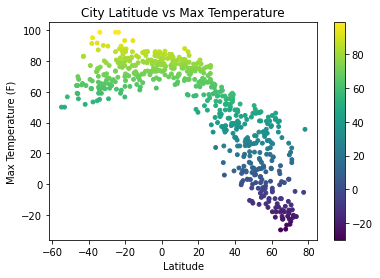

In [34]:
#Scatter plot for Latitude vs. Temperature
#set x and y axis values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Max Temp"]

# scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Temp.png")

## Latitude vs. Humidity Plot

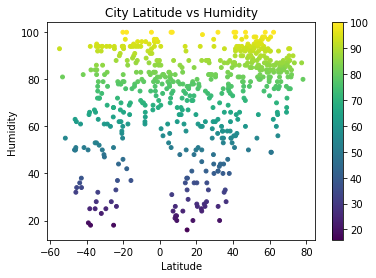

In [35]:
#Scatter plot for Latitude vs. Humidity
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Humidity"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_humidity.png")

## Latitude vs. Cloudiness Plot

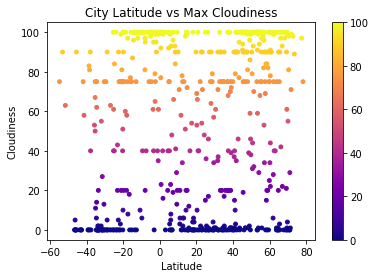

In [36]:
#Scatter plot for Latitude vs. Temperature
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Cloudiness"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "plasma")
plt.colorbar()
plt.title("City Latitude vs Max Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Cloudiness.png")

## Latitude vs. Wind Speed Plot

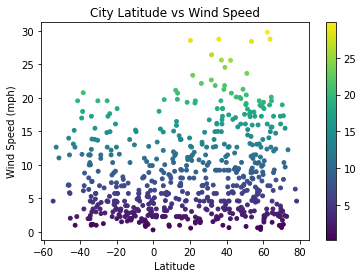

In [37]:
#Scatter plot for Latitude vs. Windspeed 
#set x and y values
x = city_weather_info_df["Lat"]
y = city_weather_info_df["Wind Speed"]

#create scatter plot
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#Save graph to a PNG file
plt.savefig("../output_data/Lat_Windspeed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [38]:
#Find the Northern Hemisphere cities
northern_HS_df = city_weather_info_df.loc[city_weather_info_df["Lat"] > 0]
northern_HS_df

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
1,Rey Bouba,CM,8.6724,14.1786,66.42,22,41,0.85,1613531698
2,Los Llanos de Aridane,ES,28.6585,-17.9182,62.60,59,79,8.05,1613531417
3,Sinnamary,GF,5.3833,-52.9500,75.43,81,3,12.17,1613531698
4,Port Blair,IN,11.6667,92.7500,80.94,65,0,11.41,1613531699
7,Albany,US,42.6001,-73.9662,24.80,63,90,20.71,1613531666
...,...,...,...,...,...,...,...,...,...
573,High Level,CA,58.5169,-117.1360,-9.63,89,84,0.38,1613531867
574,Meadow Lake,US,34.8014,-106.5436,35.60,55,75,9.22,1613531867
575,Melilla,ES,35.2937,-2.9383,51.80,93,0,3.44,1613531867
576,Cantapoy,PH,9.4906,125.4364,82.38,62,100,7.40,1613531867


The r-value is -0.8696216806538296


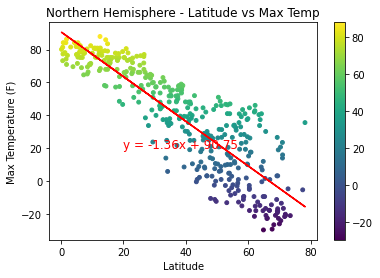

In [39]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Max Temp"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Temp.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [40]:
#Find the Southern Hemisphere cities
southern_HS_df = city_weather_info_df[city_weather_info_df["Lat"] < 0]
southern_HS_df

,City,Country,Lat,Long,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Toamasina,MG,-18.1667,49.3833,75.20,100,20,2.30,1613531698
5,Supe,PE,-10.8000,-77.7333,71.51,75,10,3.65,1613531699
6,Ancud,CL,-41.8697,-73.8203,51.80,82,75,2.30,1613531652
8,Mataura,NZ,-46.1927,168.8643,64.00,50,0,7.00,1613531699
10,Avarua,CK,-21.2078,-159.7750,84.43,62,99,4.07,1613531699
...,...,...,...,...,...,...,...,...,...
570,Yulara,AU,-25.2406,130.9889,98.60,18,61,12.66,1613531866
572,Parnamirim,BR,-5.9156,-35.2628,80.60,83,75,8.05,1613531594
578,Cururupu,BR,-1.8283,-44.8683,73.74,97,90,2.71,1613531872
579,Bloemfontein,ZA,-29.1211,26.2140,55.40,94,0,3.44,1613531872


The r-value is 0.41336455498687963


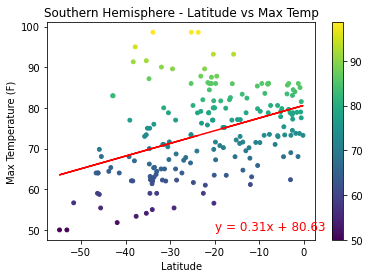

In [41]:

#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Max Temp"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-20,50),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is -0.8696216806538296


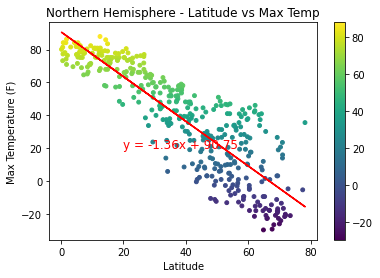

In [42]:

#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Max Temp"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(20,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Temp.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.43079406158592154


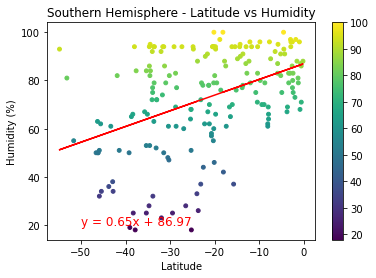

In [43]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Humidity"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Humid.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.18656335841453078


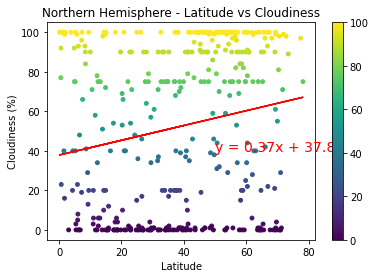

In [44]:
#Linear regression model for Latitude vs Humidity

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Cloudiness"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(50,40),fontsize=14,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.5386282452362018


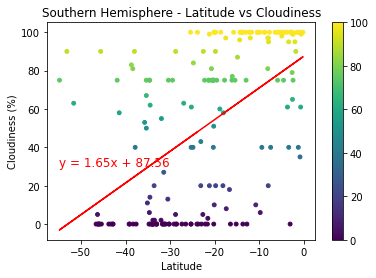

In [45]:
#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Cloudiness"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,30),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.07007624763129543


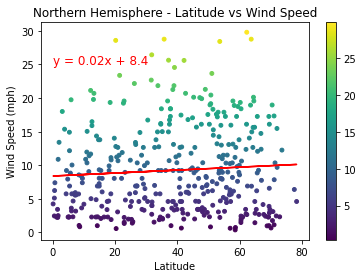

In [46]:
#Linear regression model for Latitude vs Humidity

#set x and y values
x = northern_HS_df["Lat"]
y = northern_HS_df["Wind Speed"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Northern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(0,25),fontsize=12,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/NH_Lat_Wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.29581303434805645


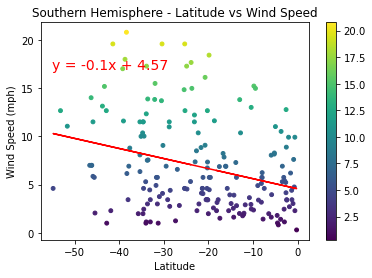

In [47]:

#Linear regression model for Latitude vs Max Temperature

#set x and y values
x = southern_HS_df["Lat"]
y = southern_HS_df["Wind Speed"]

#calculate the regression line/regress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter
plt.scatter(x, y, marker="o", s=15, c=y, cmap = "viridis")
plt.colorbar()
plt.title("Southern Hemisphere - Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#plot line
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(-55,17),fontsize=14,color="red")

#print correlation coefficient
print(f"The r-value is {rvalue}")

#Save graph to a PNG file
plt.savefig("../output_data/SH_Lat_Wind.png")